In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%html
<style> table {float:left} </style>

## Problem Statement

**About Company: **
<p>Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem</p>
</br>
<p>Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.</p>

**Variable Description**

|Variable|Description    |
|:--------|:---------------|
|Loan_ID |Unique Loan ID |
|Gender|Male/ Female   |
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|

In [3]:
#Read the train_loan_predection.csv into pandas DataFrame
loan_df = pd.read_csv('./data/loan/train_loan_predection.csv')

# Let's look at the data

In [4]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
len(loan_df)

614

## Set the Index, this is not mandatory

In [6]:
len(loan_df.Loan_ID.unique())

614

In [7]:
loan_df = loan_df.set_index('Loan_ID')

In [8]:
loan_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [9]:
loan_df.loc['LP001008']

Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          6000
CoapplicantIncome           0
LoanAmount                141
Loan_Amount_Term          360
Credit_History              1
Property_Area           Urban
Loan_Status                 Y
Name: LP001008, dtype: object

## Check for Null values

In [10]:
loan_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_df[loan_df.Gender.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N


In [12]:
loan_df[loan_df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y


### Let's drop all of the rows if one of the column has null value

In [13]:
len(loan_df)

614

In [14]:
loan_df = loan_df.dropna(how='any')

In [15]:
len(loan_df)

480

In [16]:
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Verify column data types and convert if necessary

In [17]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [19]:
loan_df.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [20]:
loan_df.Dependents.apply(lambda x:str(type(x))).value_counts()

<class 'str'>    480
Name: Dependents, dtype: int64

In [21]:
# Convert Dependents column to integers
loan_df['Dependents'] = loan_df.Dependents.apply(lambda x: int(x.replace('+','')))

In [22]:
# Now Dependents colum has descrete values
loan_df.Dependents.value_counts()

0    274
2     85
1     80
3     41
Name: Dependents, dtype: int64

In [23]:
loan_df.dtypes

Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [25]:
# add Dummy column 'Count', will be used for aggregations
loan_df['Count'] = 1

## Analyze numeric columns

In [26]:
loan_df.ApplicantIncome.describe()

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

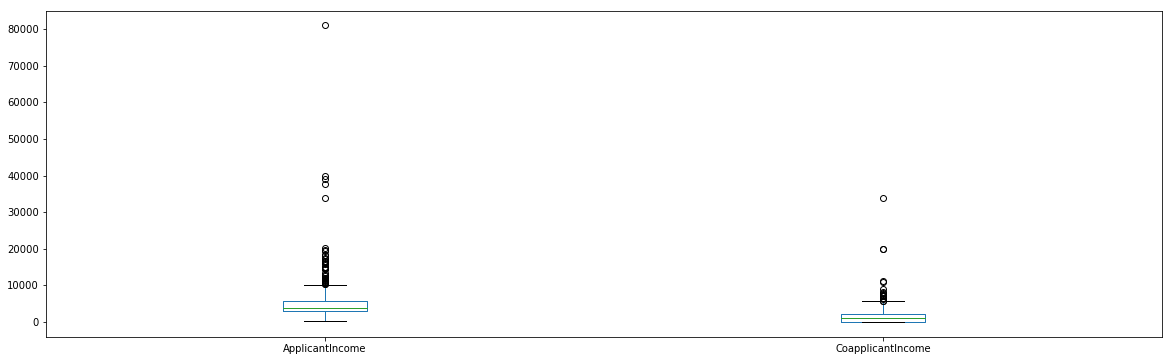

In [27]:
columns = ['ApplicantIncome', 'CoapplicantIncome']
loan_df[columns].plot(kind='box',figsize=(20,6))

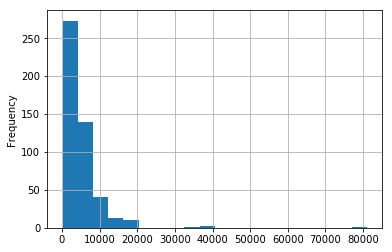

In [28]:
loan_df.ApplicantIncome.plot(kind='hist',bins=20,grid=True)

## Analyze categorical columns

## Let's analyze how the categorical data is distributed

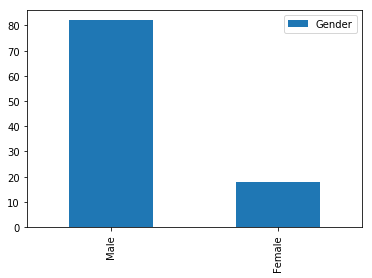

In [29]:
column_name = 'Gender'
pd.DataFrame(loan_df[column_name].value_counts()*100/len(loan_df)).plot(kind='bar')

## Let's find out how our target variable Loan_Status is related with other categorical variables

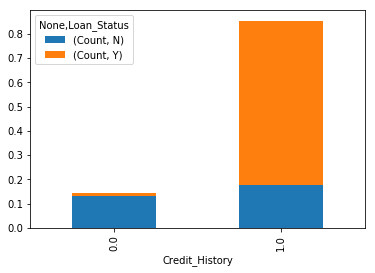

In [30]:
column_name = 'Credit_History'
columns = [column_name,'Loan_Status','Count']
(loan_df[columns].groupby([column_name,'Loan_Status']).sum().unstack()/len(loan_df)).plot(kind='bar',stacked=True)

** Loan has been sancationed to very few people who has Credit_History as 0 **

In [33]:
# Loan sanctioned to few of them even though their credit history is not 
loan_df[(loan_df.Credit_History==0) & (loan_df.Loan_Status=='Y')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count
Loan_ID,,,,,,,,,,,,,
LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y,1
LP001536,Male,Yes,3,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y,1
LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y,1
LP001882,Male,Yes,3,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y,1
LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y,1
LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y,1
LP002706,Male,Yes,1,Not Graduate,No,5285,1430.0,161.0,360.0,0.0,Semiurban,Y,1


## Addition of more fields

In [35]:
loan_status_map = {'Y':1,'N':0}
loan_df['Loan_Status_int'] = loan_df.Loan_Status.map(loan_status_map)

In [43]:
loan_df['TotalIncome'] = loan_df.ApplicantIncome + loan_df.CoapplicantIncome

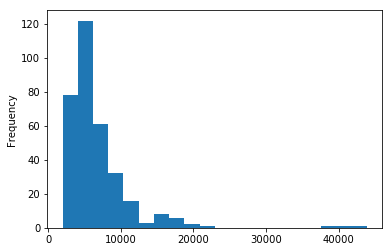

In [52]:
loan_df[loan_df.Loan_Status=='Y'].TotalIncome.plot(kind='hist',bins=20)

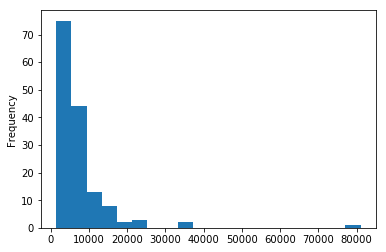

In [54]:
loan_df[loan_df.Loan_Status=='N'].TotalIncome.plot(kind='hist',bins=20)

In [58]:
loan_df[(loan_df.TotalIncome > 30000) & (loan_df.Loan_Status=='N')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,TotalIncome
Loan_ID,,,,,,,,,,,,,,,
LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1.0,Semiurban,N,1,0,33846.0
LP002317,Male,Yes,3,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N,1,0,81000.0
LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,N,1,0,35673.0


In [59]:
loan_df[(loan_df.Credit_History==1) & (loan_df.Loan_Status=='N')]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,TotalIncome
Loan_ID,,,,,,,,,,,,,,,
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,0,6091.0
LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,1,0,23809.0
LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N,1,0,4693.0
LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N,1,0,4887.0
LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N,1,0,1442.0
LP001095,Male,No,0,Graduate,No,3167,0.0,74.0,360.0,1.0,Urban,N,1,0,3167.0
LP001097,Male,No,1,Graduate,Yes,4692,0.0,106.0,360.0,1.0,Rural,N,1,0,4692.0
LP001100,Male,No,3,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N,1,0,15500.0
LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N,1,0,3600.0


In [66]:
loan_df[loan_df.Loan_Status=='N'].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,TotalIncome
count,148,148,148.000000,148,148,148.000000,148.000000,148.000000,148.000000,148.000000,148,148,148.0,148.0,148.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Rural,N,NaN,NaN,NaN
freq,116,84,NaN,112,125,NaN,NaN,NaN,NaN,NaN,54,148,NaN,NaN,NaN
mean,NaN,NaN,0.722973,NaN,NaN,5730.189189,1773.081081,153.378378,342.810811,0.574324,NaN,NaN,1.0,0.0,7503.270270
std,NaN,NaN,1.002181,NaN,NaN,7560.806737,3663.685217,90.339150,72.787021,0.496124,NaN,NaN,0.0,0.0,8140.408997
min,NaN,NaN,0.000000,NaN,NaN,150.000000,0.000000,9.000000,36.000000,0.000000,NaN,NaN,1.0,0.0,1442.000000
25%,NaN,NaN,0.000000,NaN,NaN,2863.500000,0.000000,100.000000,360.000000,0.000000,NaN,NaN,1.0,0.0,3985.250000
50%,NaN,NaN,0.000000,NaN,NaN,3871.000000,0.000000,128.000000,360.000000,1.000000,NaN,NaN,1.0,0.0,5318.000000
75%,NaN,NaN,1.000000,NaN,NaN,6046.250000,2356.250000,178.500000,360.000000,1.000000,NaN,NaN,1.0,0.0,7777.250000


In [67]:
loan_df[loan_df.Loan_Status=='Y'].describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,TotalIncome
count,332,332,332.000000,332,332,332.000000,332.000000,332.000000,332.000000,332.000000,332,332,332.0,332.0,332.000000
unique,2,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,3,1,NaN,NaN,NaN
top,Male,Yes,NaN,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y,NaN,NaN,NaN
freq,278,227,NaN,271,289,NaN,NaN,NaN,NaN,NaN,149,332,NaN,NaN,NaN
mean,NaN,NaN,0.801205,NaN,NaN,5201.093373,1495.508795,140.882530,341.710843,0.978916,NaN,NaN,1.0,1.0,6696.602169
std,NaN,NaN,1.029592,NaN,NaN,4584.815491,1982.742932,75.544237,61.651497,0.143882,NaN,NaN,0.0,0.0,4684.597263
min,NaN,NaN,0.000000,NaN,NaN,645.000000,0.000000,17.000000,60.000000,0.000000,NaN,NaN,1.0,1.0,1963.000000
25%,NaN,NaN,0.000000,NaN,NaN,2912.750000,0.000000,100.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,4164.500000
50%,NaN,NaN,0.000000,NaN,NaN,3858.500000,1211.500000,128.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,5439.000000
75%,NaN,NaN,2.000000,NaN,NaN,5818.250000,2250.000000,162.000000,360.000000,1.000000,NaN,NaN,1.0,1.0,7550.250000


## Let's prepare the data for building the model

In [70]:
loan_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Count', 'Loan_Status_int', 'TotalIncome'],
      dtype='object')

In [86]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

In [88]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
df = loan_df[columns_retained]
df = pd.get_dummies(df,columns=columns,drop_first=True)

In [89]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001003,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
LP001005,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
LP001006,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
LP001008,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1
LP001011,2,5417,4196.0,267.0,360.0,1.0,1,1,0,1,0,1,1


In [91]:
import sklearn

In [92]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test = train_test_split(df,test_size=0.2, random_state=42)

In [99]:
y_train = X_train['Loan_Status_Y']
y_test = X_test['Loan_Status_Y']
X_train = X_train.drop('Loan_Status_Y',axis=1)
X_test = X_test.drop('Loan_Status_Y',axis=1)

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [172]:
clf = RandomForestClassifier(n_estimators=500,n_jobs=-1,max_features=None)

In [173]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [174]:
d = dict(zip(clf.feature_importances_,X_test.columns))

In [175]:
for k in sorted(d.keys(),reverse=True):
    print(d[k])
    

Credit_History
ApplicantIncome
LoanAmount
CoapplicantIncome
Loan_Amount_Term
Dependents
Property_Area_Semiurban
Married_Yes
Education_Not Graduate
Self_Employed_Yes
Property_Area_Urban
Gender_Male


In [176]:
y_pred = clf.predict(X_test)

In [177]:
confusion_matrix(y_pred=y_pred,y_true=y_test)

array([[13, 15],
       [ 3, 65]])

In [178]:
accuracy_score(y_pred=y_pred,y_true=y_test)

0.8125

In [179]:
df_test = pd.read_csv('./data/loan/test_loan_predection.csv')

In [180]:
df_test = df_test.set_index('Loan_ID')

In [181]:
df_test.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [182]:
df_test = df_test.dropna(how='any')

In [183]:
len(df_test)

289

In [184]:
df_test['Dependents'] = df_test.Dependents.apply(lambda x: int(x.replace('+','')))

In [185]:
columns_retained = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [186]:
columns = ['Gender','Married','Education','Self_Employed','Property_Area']
df_test = df_test[columns_retained]
df_test = pd.get_dummies(df_test,columns=columns,drop_first=True)

In [187]:
y_test_pred = clf.predict(df_test)

In [188]:
df_test['Loan_Status_Y'] = y_test_pred

In [189]:
df_test[df_test.Loan_Status_Y==0]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
Loan_ID,,,,,,,,,,,,,
LP001051,0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1,0
LP001056,2,3881,0,147.0,360.0,0.0,1,1,1,0,0,0,0
LP001203,0,3150,0,176.0,360.0,0.0,1,0,0,0,1,0,0
LP001312,0,5293,0,92.0,360.0,1.0,1,1,1,1,0,1,0
LP001313,0,2750,0,130.0,360.0,0.0,1,0,0,0,0,1,0
LP001323,2,2779,3664,176.0,360.0,0.0,0,1,0,0,1,0,0
LP001347,0,2101,1500,108.0,360.0,0.0,0,0,0,0,0,0,0
LP001352,0,4700,0,135.0,360.0,0.0,1,1,1,0,1,0,0
LP001358,0,3445,0,130.0,360.0,0.0,1,1,0,0,1,0,0


In [197]:
x =loan_df.LoanAmount*100/loan_df.ApplicantIncome
b = loan_df[x.sort_values(ascending=False) > 8]

/home/sasidhar/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [200]:
b[b.Loan_Status=='N']

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Count,Loan_Status_int,TotalIncome
Loan_ID,,,,,,,,,,,,,,,
LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban,N,1,0,4022.0
LP001267,Female,Yes,2,Graduate,No,1378,1881.0,167.0,360.0,1.0,Urban,N,1,0,3259.0
LP001610,Male,Yes,3,Graduate,No,5516,11300.0,495.0,360.0,0.0,Semiurban,N,1,0,16816.0
LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N,1,0,1950.0
LP001835,Male,Yes,0,Not Graduate,No,1668,3890.0,201.0,360.0,0.0,Semiurban,N,1,0,5558.0
LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,N,1,0,5386.0
LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1.0,Urban,N,1,0,21600.0
